# 正規分布を知る

$$   
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}  \exp\left\{ - \frac{ (x-\mu)^2 }{ 2 \sigma^2} \right\}
$$
scipy.stats.norm https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import scipy.stats
from scipy.stats import norm  # normal distribution, 正規分布
import matplotlib.pyplot as plt
%matplotlib inline

FLAG_fig = False



#### 正規分布のグラフ pdf（probability density function）

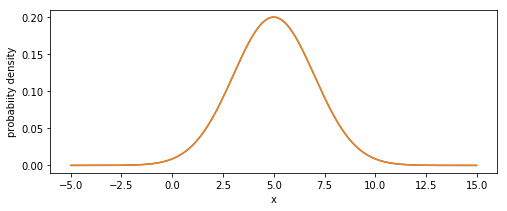

In [2]:
m = 5   # 平均値
std = 2 # 標準偏差
x = np.arange( -5, 15, 0.01)
y = norm.pdf(x, loc=m, scale=std)

fig = plt.subplots(figsize=(8,3))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('probabiity density')
plt.plot(x,y)

#### パーセント点と確率の計算
パーセント点（pp:percent point)$z_{\alpha}$ を求めるには，$1-\alpha$をppf ( percent point function )に与える。<br>
確率を求めるには，パーセント点$z_{\alpha}$をcdf (cumulative density function)　に与える。<br>
なお，標準正規分布（平均値 $m = 0$,  標準偏差 $\sigma=1$ ）を対象とする<br>

#### 片側の場合
標準正規分布$N(0,1)$のグラフで，$z_{\alpha} \le x < \infty$ の確率 $\alpha$（面積）をユーザが与える。このとき，  
$- \infty < x \le z_{\alpha} $の確率（面積）は $1-\alpha$となる。
この値をscipy.stats.norm.ppf に与えれば，$z_{\alpha}$が求まる。

In [3]:
m = 0
std = 1
alpha = 0.05
prob = 1 - alpha
z_alp = norm.ppf(prob, loc=m, scale=std)
print('パーセント点＝', z_alp) #

パーセント点＝ 1.6448536269514722


isf (Inverse survival function，生存関数の逆関数）を用いると，1-alphaの計算が不要で，上記と同じパーセント点を得る。

In [4]:
z_alp2 = norm.isf(alpha, loc=m, scale=std)
print('isfを用いたパーセント点', z_alp2)

isfを用いたパーセント点 1.6448536269514729


In [5]:
m = 0
std = 1.0
z_alp = 1.96
prob = norm.cdf(z_alp, loc=m, scale=std)
print('確率＝',prob)


確率＝ 0.9750021048517795


#### 両側の場合
区間[a b]の確率を求める。
1. $- \infty < x \le z_{b} $の確率$P_a$を求める  
2. $- \infty < x \le z_{a} $の確率$P_b$を求める
3. $P_a - P_b$を計算

In [6]:
za = 1.65
zb = -1.65
pa = norm.cdf(za, loc=0, scale=1) # loc is mean
pb = norm.cdf(zb, loc=0, scale=1) # scale is standard deviation
p = pa - pb
print('p=',p)

p= 0.9010570639327038


#### 検定では，$\alpha$が初めに与えられる。
これに基づき，片側（z_alp），両側（za, zb）を求めることが多い。  
片側の場合は既に述べた。  
両側の場合，正規分布が対称で，かつ，（za, zb）が原点を中心とした左右対称という前提があり，この場合，intervalを用いることができる。<br>
下記の例では，両側にz_alp/2=0.025 があり，この二つを足して0.05となることに留意。

In [7]:
za,zb = norm.interval(alpha=0.95, loc=0, scale=1)
print('za=',za,'  zb=',zb)


za= -1.959963984540054   zb= 1.959963984540054


#### 正規確率変数のプロット
数値的に発生した正規確率変数（正規分布に従うランダム変数）のヒストグラムをプロットする

横軸が $x$,  縦軸が頻度（データ数Nが多いほど，縦軸のスケールも大きくなる）<br>
・平均値を中心とした分布となる<br>
・データ数100程度では，正規分布の形とは言えず，データ数を非常に多くして，ようやく理想形に近くなる<br>
・標本平均値，標本標準偏差もデータ数がかなり多くないと，真値に近づかない<br>
・標準偏差の計算 x.std(ddof=1) のddof=1は“不偏標準偏差”を求めるとき，すなわち，1/(N-1)という除算を行う<br>
・このddofを指定しないと， 1/N を用いた計算を行い，不偏とならない<br>
・標準偏差はばらつきの指標となる

N = 100  mean = 2.081327  std = 3.401773e+00
N = 10000  mean = 2.031495  std = 2.991842e+00


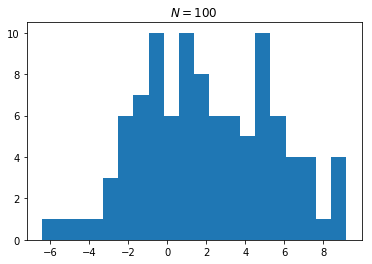

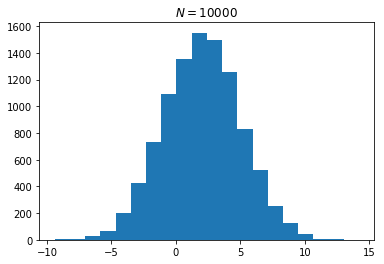

In [8]:
np.random.seed(123) # scipyと共通，乱数発生の再現性を得る

mean = 2.0 # mean, 平均値
std = 3.0  # standar deviation, 標準偏差
for N in [100, 10000]:
    x = scipy.stats.norm.rvs(loc=mean, scale=std, size=N) # rvs:Random variates
    print('N = %d  mean = %f  std = %e' % (N, x.mean(), x.std(ddof=1))) 
    plt.figure()
    plt.hist(x, bins=20)
    plt.title('$N = %i$' % (N) )

if FLAG_fig: plt.savefig('fig_PROB_NormalDist_Sim.png')
plt.show()


#### 中心極限定理
一様乱数を用いる，この区間[a,b]の平均値は$\mu = \frac{a+b}{2}$, 分散$\sigma^2 = \frac{(b-a)^2}{12}$である。
このn個（幾つかの値）の標本平均をN個（これは一定とする）発生させ，その分布を見ると，正規分布$N(\mu, \sigma^2/n )$に近づく。ここでは，標準正規分布に正規化する。
他の分布でも試してみられたい。

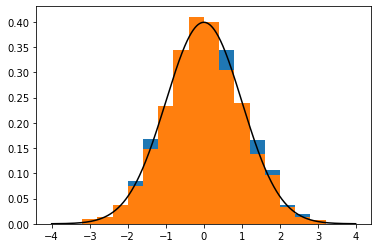

In [9]:
N = 2000
y= np.zeros(N)
for n in [5, 5000]:
    for i in range(N):
        x = scipy.stats.uniform.rvs(size=n)
        y[i] = (x.mean() - 1/2)/(np.sqrt(1/12)/np.sqrt(n))
    plt.hist(y, bins=20, range=(-4,4), density=True)

xx = np.arange(-4, 4, 0.01)
nrm = scipy.stats.norm.pdf(xx, loc=0.0, scale=1.0 )
plt.plot(xx, nrm, c='k')

if FLAG_fig: plt.savefig('fig_PROB_NormalDist_Climt.png')
plt.show()

t分布について調べる

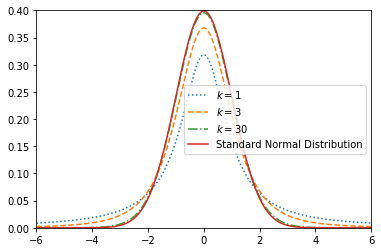

In [9]:
from scipy.stats import t
x = np.linspace(-6, 6, 1000)
fig,ax = plt.subplots(1,1)
 
linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 3, 30]
for k, ls in zip(deg_of_freedom, linestyles):
  ax.plot(x, t.pdf(x, k), linestyle=ls, label=r'$k=%i$' % k)
 
ax.plot(x, norm.pdf(x, 0, 1), linestyle='-', label="Standard Normal Distribution")
 
plt.xlim(-6, 6)
plt.ylim(0, 0.4)
 
plt.legend()
plt.show()